In [63]:
using Plots
using SparseArrays
using LinearAlgebra
using BenchmarkTools
using DifferentialEquations

In [64]:
function set_initial_condition_1(x)
    A = 100.
    l = 80
    -A * sin((pi / l ) * x)
 

end

set_initial_condition_1 (generic function with 1 method)

# A) Define function 

$$ 

\frac{\partial ^2 W}{\partial t^2} = \alpha \frac{\partial ^4 W}{\partial x^4} 
$$
$$
\Leftrightarrow

\frac{\partial ^2 W}{\partial t^2} = \alpha  \times f(du,u,p,t)
$$

With the function $ f(du,u,p,t) $ for i in [1,N+1] : 

$$
du[1] = \frac{u_2 - u_1}{dx}
$$

$$
du[2] = \frac{u_3 - 2u_2 + u_1}{dx^2}
$$

$$
du[3:length(u)-2] = \frac{u_{i+2} - 4u_{i+1} + 6u_{i} -4u_{i-1} + u_{i-2}}{dx^4}
$$

$$
du[N] = \frac{u_{N+1}- 2u_N + u_{N-1}}{dx^2}
$$

$$
du[N+1] = \frac{u_{N+1} - u_N}{dx}
$$

Morover, the CFL condition is $ \frac{dx^2}{2C} > dt $


In [65]:
function biharmonic_equation!(du,u,p,t)
    alpha,dx = p

    du[1] = alpha * (-u[1] + u[2]) / dx  
    du[2] = alpha * (u[1] - 2*u[2] + u[3])/dx^2 

    for i in 3:(length(u)-1)-2
        du[i] = alpha * (u[i-2] - 4*u[i-1] + 6*u[i] -4*u[i+1] + u[i+2])/dx^4 
    end 

    du[end-1] = alpha * (u[end-2] - 2*u[end-1] + u[end])/dx^2
    du[end] = alpha * (-u[end-1] + u[end]) / dx
  
end 

biharmonic_equation! (generic function with 1 method)

In [66]:

L = 80.0
dx = 0.5
x = 0.0:dx:L


init = set_initial_condition_1.(x)
alpha = 0.00000000000000005
P = [alpha, dx]

t_begin  = 0.0
t_end = 1000.0
tspan = (t_begin, t_end)

prob = ODEProblem(biharmonic_equation!, init, tspan, P)
sol = DifferentialEquations.solve(prob, RK4(), abstol=1e-8, reltol=1e-8)


retcode: Success
Interpolation: 3rd order Hermite
t: 9-element Vector{Float64}:
    0.0
    9.999999999999999e-5
    0.0010999999999999998
    0.011099999999999997
    0.11109999999999996
    1.1110999999999995
   11.111099999999993
  111.11109999999994
 1000.0
u: 9-element Vector{Vector{Float64}}:
 [-0.0, -1.96336924606283, -3.925981575906861, -5.887080365118903, -7.845909572784494, -9.80171403295606, -11.753739745783765, -13.701234168196802, -15.643446504023087, -17.57962799343545  …  -17.579627993435473, -15.643446504023098, -13.701234168196805, -11.753739745783754, -9.801714032956083, -7.845909572784507, -5.887080365118905, -3.925981575906895, -1.9633692460628533, -1.2246467991473532e-14]
 [-1.96336924606283e-20, -1.96336924606283, -3.925981575906861, -5.887080365118903, -7.845909572784494, -9.80171403295606, -11.753739745783765, -13.701234168196802, -15.643446504023087, -17.57962799343545  …  -17.579627993435473, -15.643446504023098, -13.701234168196805, -11.753739745783754, -9.80

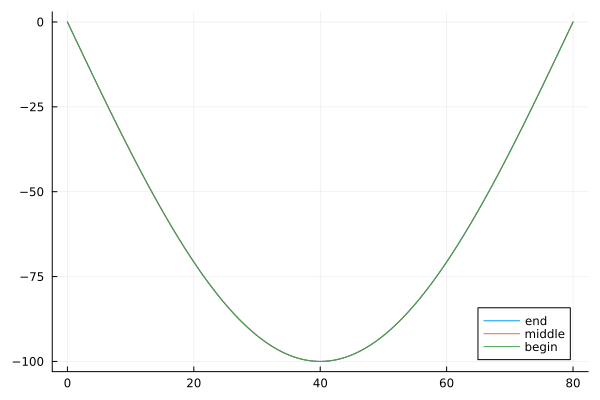

In [67]:
u_t = sol(t_end)
#=plot(x,sol2(1000), label = "1000s")
plot!(x,sol2(800), label = "800s")
plot!(x,sol2(700), label = "700s")
plot!(x,sol2(600), label = "600s")
plot!(x,sol2(400), label = "400s")
plot!(x,sol2(300), label="300s")
plot!(x,sol2(200), label = "200s")=#
plot(x,sol(t_end), label = "end")
plot!(x,sol(500), label = "middle")
plot!(x,sol(t_begin), label = "begin")
#plot(x,sol2(t_begin), label = "0s")

# Doesn't Work for now 